In [1]:
import pandas as pd

data = pd.read_csv('/Users/kwonsuhyun/python/bigdata/data/Ex_CEOSalary.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
salary      209 non-null int64
sales       209 non-null float64
roe         209 non-null float64
industry    209 non-null int64
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [2]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


In [4]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [5]:
data['industry'] = data['industry'].replace([1,2,3,4],['service','it','finance','others'])
data['industry'].value_counts()

service    72
finance    60
it         46
others     31
Name: industry, dtype: int64

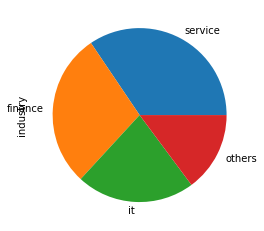

In [7]:
%matplotlib inline
data['industry'].value_counts().plot(kind='pie')

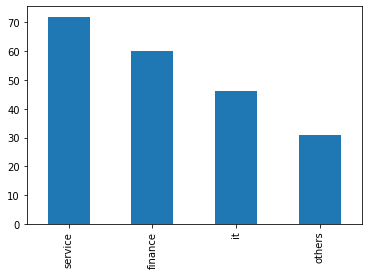

In [8]:
data['industry'].value_counts().plot(kind='bar')

In [9]:
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [10]:
data.skew()

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [11]:
data.kurtosis()

salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed480321d0>,
      dtype=object)

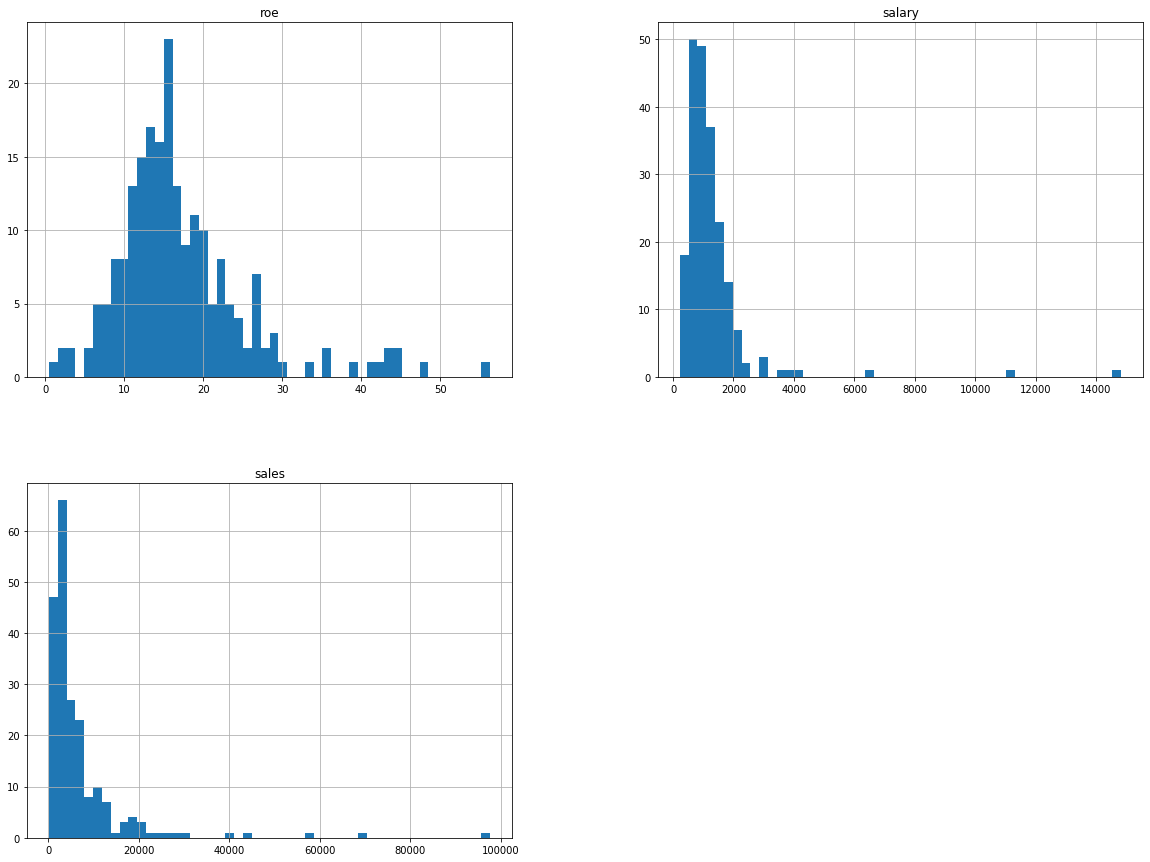

In [12]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))

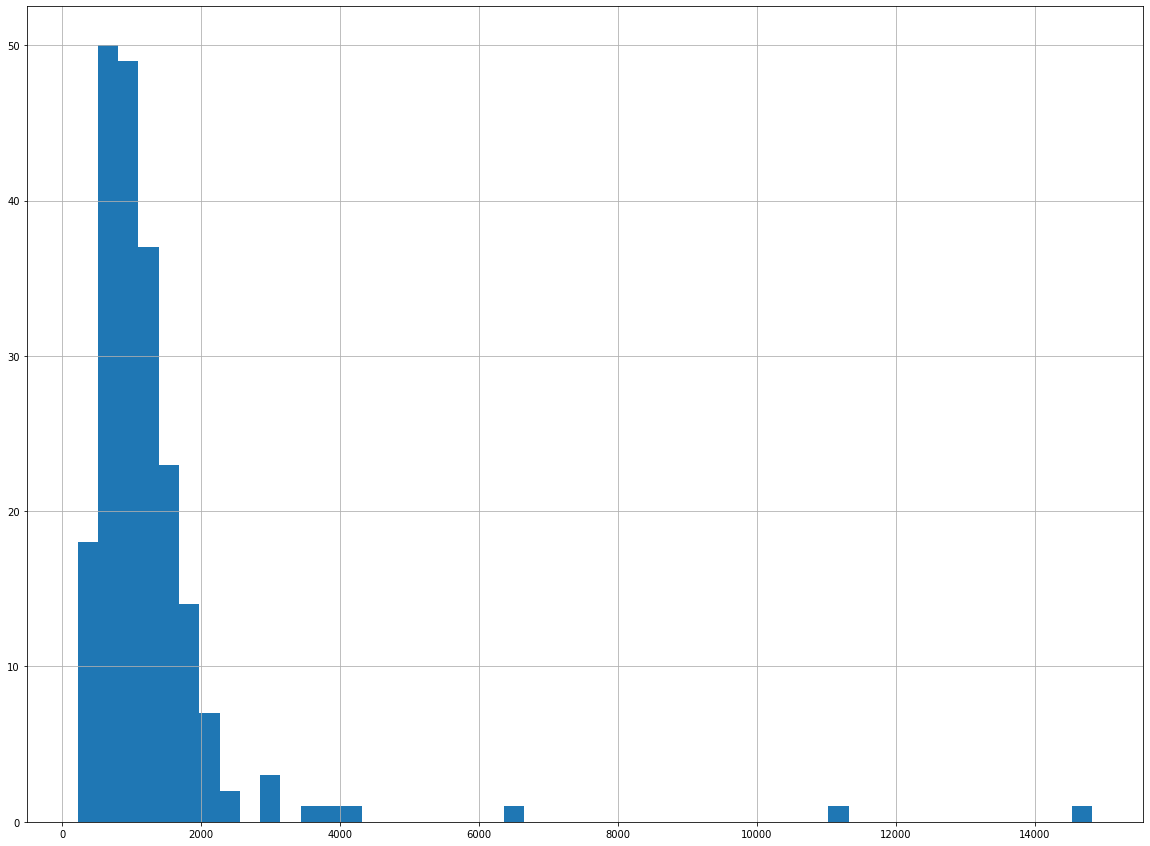

In [13]:
data['salary'].hist(bins=50,figsize=(20,15))

secsion2

In [14]:
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [15]:
data.corr(method='pearson')

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [16]:
data.corr(method='spearman')

,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


In [17]:
data.corr(method='kendall')

,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


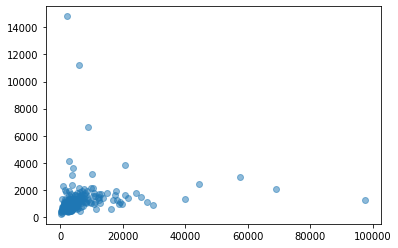

In [18]:
import matplotlib.pyplot as plt
plt.scatter(data['sales'],data['salary'],alpha=0.5)
plt.show()

In [19]:
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
it         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
finance   14822.0  
it         6640.0  
others     1100.0  
service    3844.0

section3

Boxplot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fed6adf7490>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fed58046150>, <matplotlib.lines.Line2D object at 0x7fed58046690>], 'caps': [<matplotlib.lines.Line2D object at 0x7fed58046b50>, <matplotlib.lines.Line2D object at 0x7fed58030210>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fed5803d490>], 'medians': [<matplotlib.lines.Line2D object at 0x7fed5804c5d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fed5804cad0>], 'means': []})

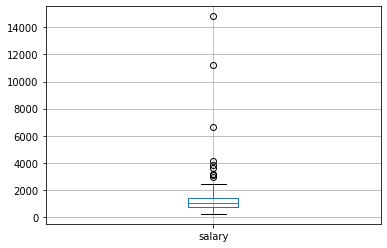

In [21]:
data.boxplot(column='salary',return_type='both')

In [22]:
q1_salary = data['salary'].quantile(q=0.25)
q3_salary = data['salary'].quantile(q=0.75)
iqr_salary = q3_salary - q1_salary
iqr_salary

671.0

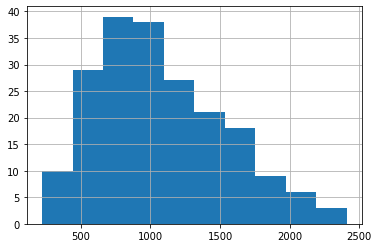

In [25]:
data_iqr = data[(data['salary']<q3_salary+1.5*iqr_salary) & (data['salary']>q1_salary-1.5*iqr_salary)]
data_iqr['salary'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed6bcb3710>,
      dtype=object)

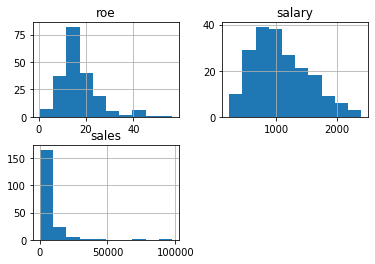

In [26]:
data_iqr.hist()

In [27]:
data_iqr.corr()

,salary,sales,roe
salary,1.000000,0.335446,0.289704
sales,0.335446,1.000000,-0.065034
roe,0.289704,-0.065034,1.000000


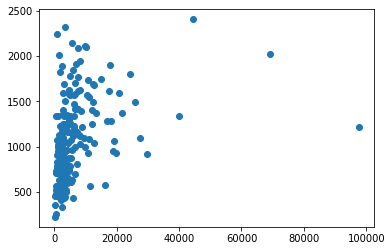

In [29]:
import matplotlib.pyplot as plt
plt.scatter(data_iqr['sales'],data_iqr['salary'])
plt.show()

In [31]:
q1_sales = data['sales'].quantile(q=0.25)
q3_sales = data['sales'].quantile(q=0.75)
iqr_sales = q3_sales - q1_sales
iqr_sales

4966.6999511718695

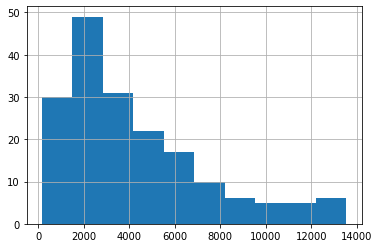

In [32]:
data_iqr = data[(data['sales']>q1_sales-1.5*iqr_sales) & (data['sales']<q3_sales+1.5*iqr_sales) & (data['salary']>q1_salary-1.5*iqr_salary) & (data['salary']<q3_salary+1.5*iqr_salary)]
data_iqr['sales'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed38211e50>,
      dtype=object)

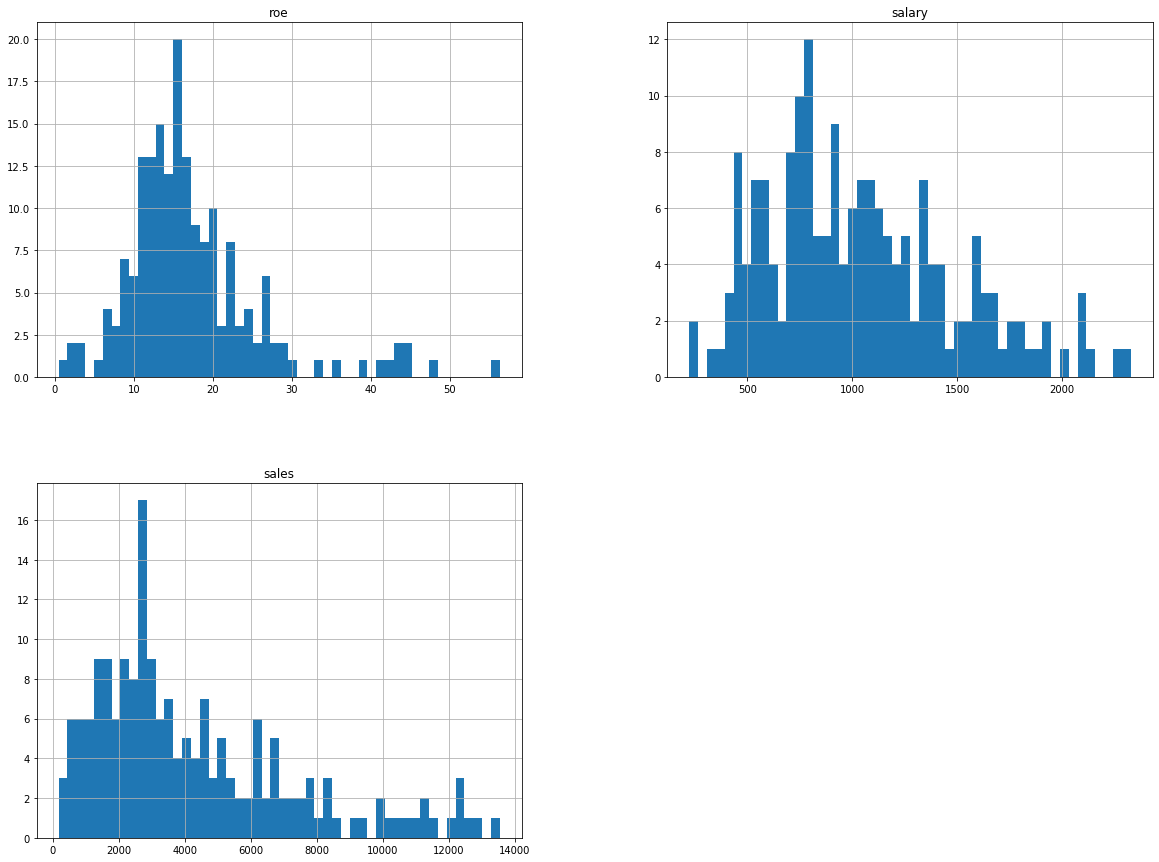

In [33]:
data_iqr.hist(bins=50,figsize=(20,15))

In [34]:
data_iqr.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000


section04

In [36]:
import numpy as np
data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe
0,1095,27595.000000,14.1,service,6.998510,10.225390,2.646175
1,1001,9958.000000,10.9,service,6.908755,9.206132,2.388763
2,1122,6125.899902,23.5,service,7.022868,8.720281,3.157000
3,578,16246.000000,5.9,service,6.359574,9.695602,1.774952
4,1368,21783.199219,13.8,service,7.221105,9.988894,2.624669


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed7b6e23d0>,
      dtype=object)

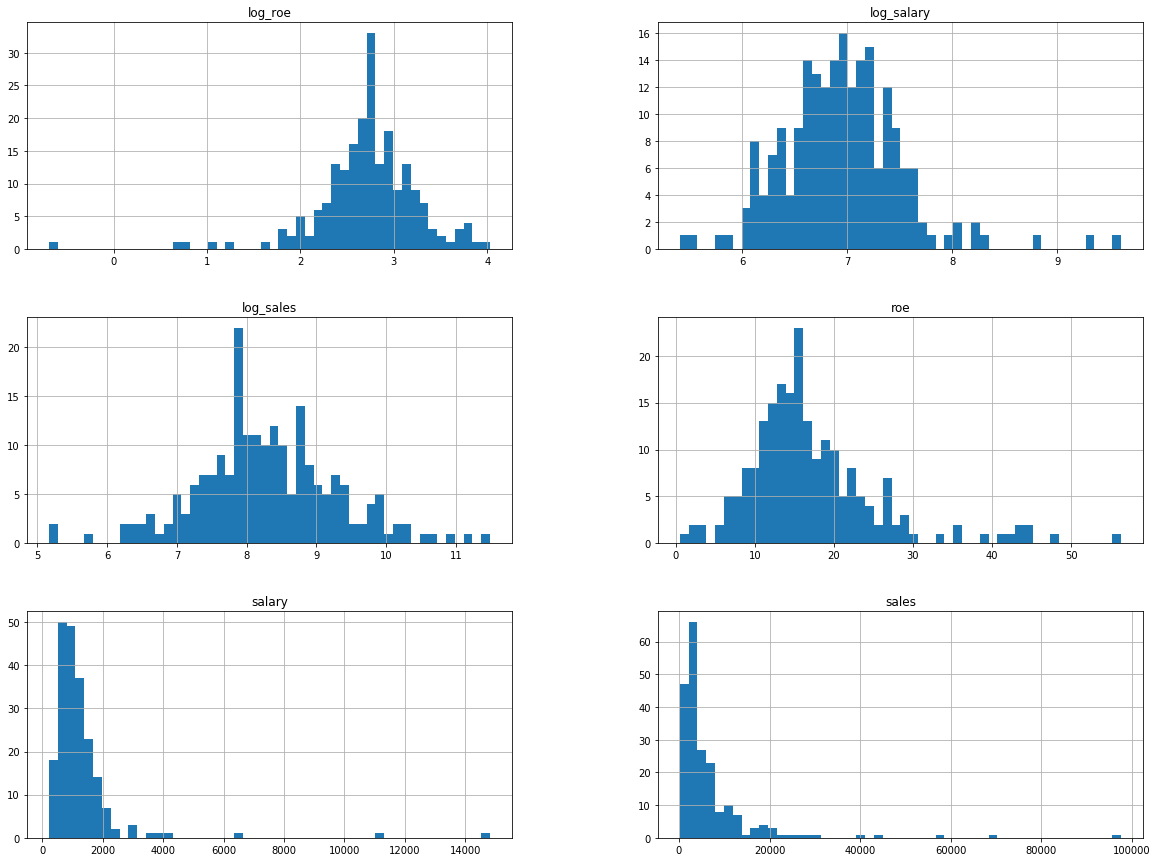

In [37]:
data.hist(bins=50,figsize=(20,15))

In [38]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000


In [39]:
data['sqrt_salary'] = np.sqrt(data['salary'])
data['sqrt_sales'] = np.sqrt(data['sales'])
data['sqrt_roe'] = np.sqrt(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
0,1095,27595.000000,14.1,service,6.998510,10.225390,2.646175,33.090784,166.117428,3.754997
1,1001,9958.000000,10.9,service,6.908755,9.206132,2.388763,31.638584,99.789779,3.301515
2,1122,6125.899902,23.5,service,7.022868,8.720281,3.157000,33.496268,78.268128,4.847680
3,578,16246.000000,5.9,service,6.359574,9.695602,1.774952,24.041631,127.459798,2.428992
4,1368,21783.199219,13.8,service,7.221105,9.988894,2.624669,36.986484,147.591325,3.714835


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed7c30ad10>,
      dtype=object)

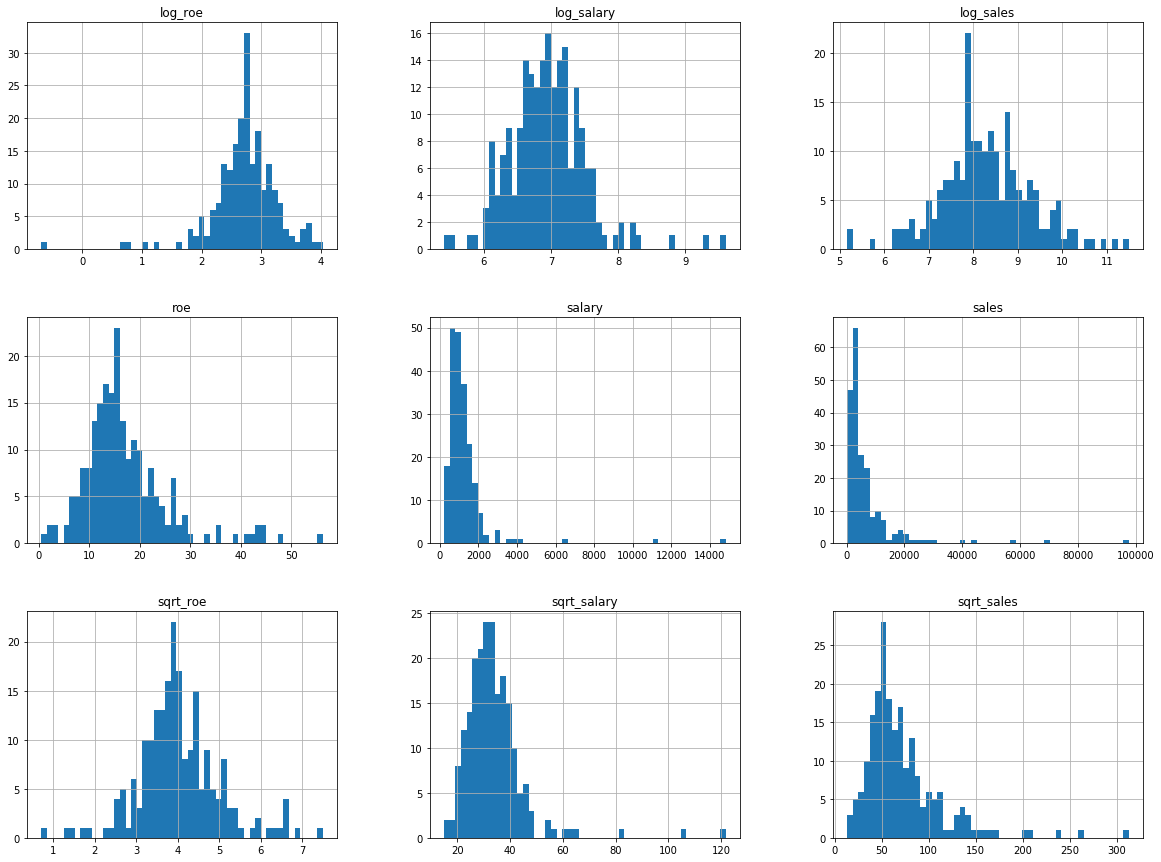

In [40]:
data.hist(bins=50,figsize=(20,15))

In [41]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


section05

In [43]:
data = pd.read_csv('/Users/kwonsuhyun/python/bigdata/data/Ex_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [44]:
data.isnull()

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [45]:
data.notnull()

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


In [46]:
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [47]:
data.notnull().sum()

salary       8
sales        8
roe          9
industry    10
dtype: int64

In [48]:
data.isnull().sum(1)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

In [49]:
data['valid'] = data.notnull().sum(1)

In [50]:
data

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,NaN,9958.000000,10.900000,1,3
2,NaN,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,NaN,13.800000,1,3
5,1145.0,NaN,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


In [51]:
data_del_row = data.dropna(axis=0)
data_del_row

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
3,578.0,16246.000000,5.900000,1,4
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4


In [52]:
data_del_col = data.dropna(axis=1)
data_del_col

,industry,valid
0,1,4
1,1,3
2,1,3
3,1,4
4,1,3
5,2,3
6,2,4
7,2,4
8,2,4
9,2,3


In [53]:
data[['salary']].dropna()

,salary
0,1095.0
3,578.0
4,1368.0
5,1145.0
6,1078.0
7,1094.0
8,1237.0
9,833.0


In [54]:
data[['salary','sales','roe','industry']].dropna()

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [55]:
data[['salary','sales','roe','industry']].dropna(axis=1)

,industry
0,1
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,2


In [56]:
data

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,NaN,9958.000000,10.900000,1,3
2,NaN,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,NaN,13.800000,1,3
5,1145.0,NaN,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


In [57]:
data = pd.read_csv('/Users/kwonsuhyun/python/bigdata/data/Ex_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [58]:
data_0 = data.fillna(0)
data_0

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,0.0,9958.000000,10.900000,1
2,0.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,0.000000,13.800000,1
5,1145.0,0.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,0.000000,2


In [59]:
data.groupby('industry').mean()

,salary,sales,roe
industry,,,
1,1013.666667,14981.224975,13.64
2,1077.400000,3158.425049,15.80


In [62]:
fill_mean_func = lambda g: g.fillna(g.mean())

In [63]:
data_group_mean = data.groupby('industry').apply(fill_mean_func)
data_group_mean

salary         sales        roe  industry
industry                                                  
1        0  1095.000000  27595.000000  14.100000         1
         1  1013.666667   9958.000000  10.900000         1
         2  1013.666667   6125.899902  23.500000         1
         3   578.000000  16246.000000   5.900000         1
         4  1368.000000  14981.224975  13.800000         1
2        5  1145.000000   3158.425049  20.000000         2
         6  1078.000000   2266.699951  16.400000         2
         7  1094.000000   2966.800049  16.299999         2
         8  1237.000000   4570.200195  10.500000         2
         9   833.000000   2830.000000  15.800000         2

In [64]:
fill_values = {1:1000,2:2000}
fill_func = lambda d: d.fillna(fill_values[d.name])

In [65]:
data_group_value = data.groupby('industry').apply(fill_func)
data_group_value

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1000.0,9958.000000,10.900000,1
2,1000.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1000.000000,13.800000,1
5,1145.0,2000.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,2000.000000,2


section06

In [66]:
import pandas as pd
data = pd.read_csv('/Users/kwonsuhyun/python/bigdata/data/house_raw.csv')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [67]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed6fb9aa10>,
      dtype=object)

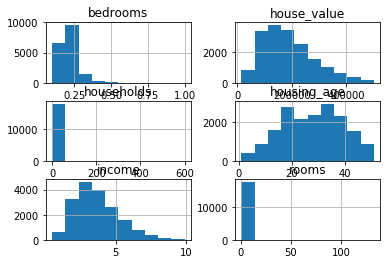

In [70]:
data.hist()